https://github.com/gilbutITbook/006958/blob/master/deeplearning/deep_code/08_Wine.py

https://github.com/gilbutITbook/006958/blob/master/deeplearning/deep_code/09_Wine_Checkpoint.py

https://github.com/gilbutITbook/006958/blob/master/deeplearning/deep_code/10_Wine_Overfit_Graph.py

https://github.com/gilbutITbook/006958/blob/master/deeplearning/deep_code/11_Wine_Early_Stop.py

https://github.com/gilbutITbook/006958/blob/master/deeplearning/deep_code/12_Wine_Check_and_Stop.py

와인 분류(레드 와인/화이트 와인) 문제

In [1]:

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy
import matplotlib.pyplot as plt

# seed 값 설정
seed = 0
numpy.random.seed(seed)

# 데이터 입력
df_pre = pd.read_csv('C:/dataset/gilbut/wine.csv', header=None)
df = df_pre.sample(frac=1)

In [2]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
5316,6.3,0.18,0.24,3.4,0.053,20.0,119.0,0.99373,3.11,0.52,9.2,6,0
5210,6.8,0.14,0.18,1.4,0.047,30.0,90.0,0.99164,3.27,0.54,11.2,6,0
3518,7.3,0.22,0.50,13.7,0.049,56.0,189.0,0.99940,3.24,0.66,9.0,6,0
1622,7.6,0.67,0.14,1.5,0.074,25.0,168.0,0.99370,3.05,0.51,9.3,5,0
2443,7.3,0.21,0.29,1.6,0.034,29.0,118.0,0.99170,3.30,0.50,11.0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,6.5,0.22,0.28,3.7,0.059,29.0,151.0,0.99177,3.23,0.41,12.1,7,0
3264,6.5,0.13,0.37,1.0,0.036,48.0,114.0,0.99110,3.41,0.51,11.5,8,0
1653,6.8,0.20,0.59,0.9,0.147,38.0,132.0,0.99300,3.05,0.38,9.1,6,0
2607,6.6,0.22,0.37,1.2,0.059,45.0,199.0,0.99300,3.37,0.55,10.3,7,0


In [4]:
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [5]:
# 모델 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
# 모델 컴파일
model.compile(loss='binary_crossentropy',
           optimizer='adam',
           metrics=['accuracy'])


## 모델 업데이트하기
모델을 그냥 저장하는 것이 아니라, 에포크마다 모델의 정확도를 함께 기록하면서 저장하는 것. 에포크 횟수와 이때의 테스트셋 오차 값을 이용해 파일 이름을 만들어 hdf5라는 확장자로 저장

In [7]:
import os

# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

In [8]:
from keras.callbacks import ModelCheckpoint

# 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

## 이제 모델을 학습할 때마다 위에서 정한 checkpointer의 값을 받아 지정된 곳에 모델을 저장

In [9]:
# 모델 실행 및 저장
model.fit(X, Y, validation_split=0.2, epochs=200, batch_size=200, verbose=0, callbacks=[checkpointer])


Epoch 00001: val_loss improved from inf to 0.52558, saving model to ./model/01-0.5256.hdf5

Epoch 00002: val_loss improved from 0.52558 to 0.34018, saving model to ./model/02-0.3402.hdf5

Epoch 00003: val_loss improved from 0.34018 to 0.30062, saving model to ./model/03-0.3006.hdf5

Epoch 00004: val_loss improved from 0.30062 to 0.24740, saving model to ./model/04-0.2474.hdf5

Epoch 00005: val_loss improved from 0.24740 to 0.22057, saving model to ./model/05-0.2206.hdf5

Epoch 00006: val_loss improved from 0.22057 to 0.21476, saving model to ./model/06-0.2148.hdf5

Epoch 00007: val_loss improved from 0.21476 to 0.20513, saving model to ./model/07-0.2051.hdf5

Epoch 00008: val_loss improved from 0.20513 to 0.20459, saving model to ./model/08-0.2046.hdf5

Epoch 00009: val_loss improved from 0.20459 to 0.20141, saving model to ./model/09-0.2014.hdf5

Epoch 00010: val_loss did not improve from 0.20141

Epoch 00011: val_loss improved from 0.20141 to 0.20094, saving model to ./model/11-0.20

In [ ]:
## 에포크 0~199까지 총 200개의 모델이 저장되었음
## 이때 ModelCheckpoint() 함수에 모델이 앞서 저장한 모델보다 나아졌을 때만 저장하게끔 하려면 save_best_only 값을 TRUE로 지정

## 학습 시간에 따른 정확도와 테스트 결과를 그래프로 확인하기

In [10]:
## 시간이 너무 오래 걸리지 않도록 전체 샘플 중 15%만 불러옴
df = df_pre.sample(frac=0.15)

In [11]:
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [12]:
# 모델의 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
# 모델 컴파일
model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])


In [14]:
# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)


In [15]:
# 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [16]:
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)

 0.9954 - val_loss: 0.0632 - val_accuracy: 0.9907
Epoch 3363/3500
2/2 [==============================] - 0s 25ms/step - loss: 0.0077 - accuracy: 0.9985 - val_loss: 0.0632 - val_accuracy: 0.9907
Epoch 3364/3500
2/2 [==============================] - 0s 26ms/step - loss: 0.0107 - accuracy: 0.9985 - val_loss: 0.0628 - val_accuracy: 0.9907
Epoch 3365/3500
2/2 [==============================] - 0s 25ms/step - loss: 0.0075 - accuracy: 0.9985 - val_loss: 0.0749 - val_accuracy: 0.9907
Epoch 3366/3500
2/2 [==============================] - 0s 30ms/step - loss: 0.0137 - accuracy: 0.9954 - val_loss: 0.0674 - val_accuracy: 0.9907
Epoch 3367/3500
2/2 [==============================] - 0s 25ms/step - loss: 0.0081 - accuracy: 0.9985 - val_loss: 0.0649 - val_accuracy: 0.9907
Epoch 3368/3500
2/2 [==============================] - 0s 26ms/step - loss: 0.0127 - accuracy: 0.9954 - val_loss: 0.0650 - val_accuracy: 0.9907
Epoch 3369/3500
2/2 [==============================] - 0s 25ms/step - loss: 0.0098 - a

In [ ]:
## 모델이 학습되는 과정을 history 변수에 저장
## 긴 학습을 지켜보기 위해 에포크를 3500으로 조정
## 배치 크기는 500으로 늘려 한 번 딥러닝을 가동할 때 더 많이 입력되게끔
## 샘플 중 33%는 분리하여 테스트셋으로 사용

In [18]:
import matplotlib.pyplot as plt

# y_vloss에 테스트셋으로 실험한 결과의 오차 값을 저장
y_vloss = history.history['val_loss']

# y_acc에 학습 셋으로 측정한 정확도의 값을 저장
y_acc = history.history['accuracy']

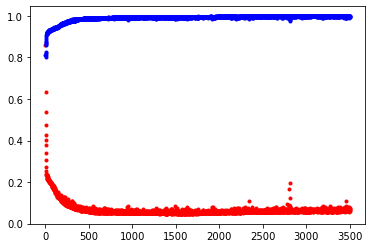

In [19]:
# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

In [ ]:
## 학습셋의 정확도는 시간이 흐를수록 좋아짐
## 하지만 테스트 결과는 어느 정도 시간이 흐르면 더 나아지지 않음

## 학습의 자동 중단
학습이 진행되어도 테스트셋 오차가 줄지 않으면 학습을 멈추게 하는 기능

In [20]:
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
           optimizer='adam',
           metrics=['accuracy'])

In [21]:
from keras.callbacks import EarlyStopping

# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [ ]:
## 모니터할 값과 테스트 오차가 좋아지지 않아도 몇 번까지 기다릴지를 정함

In [22]:
# 모델 실행
model.fit(X, Y, validation_split=0.2, epochs=2000, batch_size=500, callbacks=[early_stopping_callback])

===========] - 0s 26ms/step - loss: 0.0212 - accuracy: 0.9936 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 1280/2000
2/2 [==============================] - 0s 30ms/step - loss: 0.0177 - accuracy: 0.9949 - val_loss: 0.0139 - val_accuracy: 0.9949
Epoch 1281/2000
2/2 [==============================] - 0s 26ms/step - loss: 0.0197 - accuracy: 0.9962 - val_loss: 0.0136 - val_accuracy: 0.9949
Epoch 1282/2000
2/2 [==============================] - 0s 25ms/step - loss: 0.0180 - accuracy: 0.9962 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 1283/2000
2/2 [==============================] - 0s 26ms/step - loss: 0.0197 - accuracy: 0.9949 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 1284/2000
2/2 [==============================] - 0s 27ms/step - loss: 0.0193 - accuracy: 0.9949 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 1285/2000
2/2 [==============================] - 0s 27ms/step - loss: 0.0211 - accuracy: 0.9936 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 1286/2000
1/2 [===========

In [ ]:
## 에포크를 2000으로 설정하였지만, 도중에 계산이 멈추는 것을 확인할 수 있음

## 모델 업데이트 함수와 학습 자동 중단 함수 동시에 사용

In [ ]:
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])


In [ ]:
# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

In [ ]:
# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [ ]:
# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [ ]:
model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=500, verbose=0, callbacks=[early_stopping_callback,checkpointer])
